#  House Price Prediction using Linear Regression

### Oasis Infobyte Internship – Level 2 Project

House price prediction is a common real-world machine learning problem.
The goal of this project is to analyze housing data and predict house prices
based on features such as area, number of bedrooms, bathrooms, and other amenities. We use **Exploratory Data Analysis (EDA)** and a **Linear Regression model** to understand and predict housing prices.

This project follows a complete data analytics and machine learning workflow.



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [3]:
df=pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

df.info()

In [9]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Data Quality Checks

Before building the model, we check for:
- Missing (null) values
- Duplicate rows

This ensures the dataset is clean and reliable for machine learning.


In [11]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

##  Price Distribution

This graph shows how house prices are spread across the dataset.


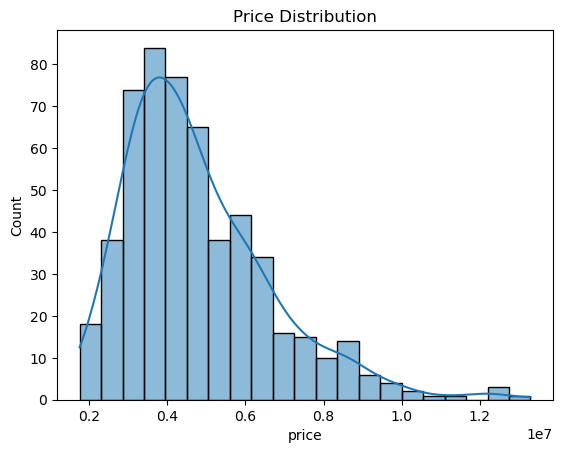

In [22]:
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.show()


## Area vs Price

This graph shows how house area affects price.


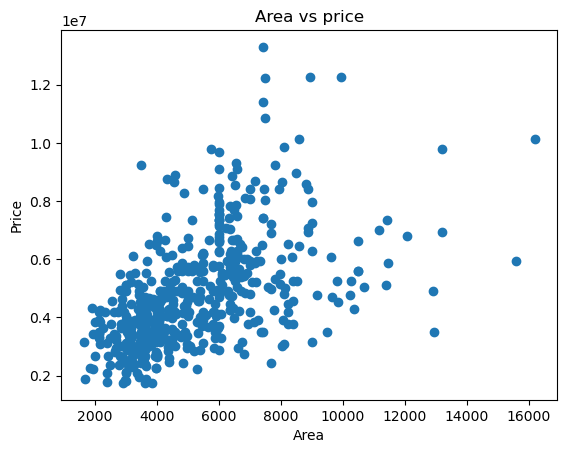

In [24]:
plt.scatter(df['area'],df['price'])
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs price")
plt.show()

##  Bedrooms vs Price


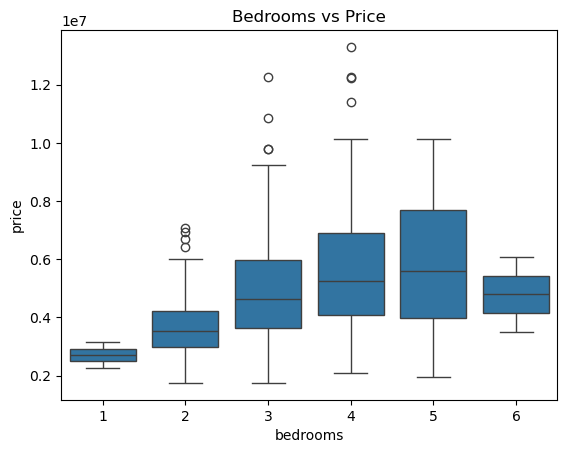

In [25]:
sns.boxplot(x=df['bedrooms'], y=df['price'])
plt.title("Bedrooms vs Price")
plt.show()


## Categorical Features
These columns contain text values and must be converted into numbers before modeling.


In [14]:
df.select_dtypes(include='object').columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

##  Encoding Categorical Variables


In [15]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


##  Feature Selection


In [18]:
X= df.drop('price',axis=1)
y= df['price']


## Train-Test Split


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


##  Model Training (Linear Regression)


In [20]:
model=LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Model Predictions


In [26]:
y_pred=model.predict(X_test)

##  Model Evaluation

We evaluate how accurate the model predictions are.


In [27]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Mean Absolute Error: 970043.4039201635
R2 Score: 0.6529242642153186


##  Conclusion

The model was able to learn patterns in house prices using features like area, bedrooms, and amenities.

This project demonstrates the complete machine learning workflow:
- Data cleaning
- Visualization
- Feature engineering
- Model training
- Model evaluation
